In [ ]:
import pandas as pd # data analysis and data handling
import numpy as np  # numerical calculation
import matplotlib.pyplot as plt # visulization
import seaborn as sns # advanced visualization

In [ ]:
#ignore the warnings by importing
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load Bitcoin price data
btc=pd.read_csv("/content/BTC-USD.csv")

In [ ]:
btc.sample(4)

,Date,Open,High,Low,Close,Adj_Close,Volume
2902,28-08-2022,20041.035160,20139.054690,19616.814450,19616.814450,19616.814450,2.436681e+10
2110,27-06-2020,9167.824219,9207.810547,8998.216797,9045.390625,9045.390625,1.727309e+10
655,03-07-2016,704.968018,704.968018,649.008972,658.664001,658.664001,1.295120e+08
976,20-05-2017,1984.239990,2084.729980,1974.920044,2084.729980,2084.729980,9.613360e+08


In [ ]:
btc.tail(10)

,Date,Open,High,Low,Close,Adj_Close,Volume
3218,10-07-2023,30172.42383,31026.08398,29985.39453,30414.47070,30414.47070,1.482821e+10
3219,11-07-2023,30417.63281,30788.31445,30358.09766,30620.95117,30620.95117,1.215184e+10
3220,12-07-2023,30622.24609,30959.96484,30228.83594,30391.64648,30391.64648,1.480566e+10
3221,13-07-2023,30387.48828,31814.51563,30268.35156,31476.04883,31476.04883,2.368608e+10
3222,14-07-2023,31474.72070,31582.25391,29966.38672,30334.06836,30334.06836,2.091790e+10
3223,15-07-2023,30331.78320,30407.78125,30263.46289,30295.80664,30295.80664,8.011668e+09
3224,16-07-2023,30297.47266,30437.56055,30089.66992,30249.13281,30249.13281,8.516564e+09
3225,17-07-2023,30249.62695,30336.40039,29685.78320,30145.88867,30145.88867,1.324016e+10
3226,18-07-2023,30147.07031,30233.65625,29556.42773,29856.56250,29856.56250,1.313890e+10
3227,20-07-2023,29919.06445,30224.11523,29918.28125,30189.90234,30189.90234,1.190664e+10


In [ ]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3228 non-null   object 
 1   Open       3228 non-null   float64
 2   High       3228 non-null   float64
 3   Low        3228 non-null   float64
 4   Close      3228 non-null   float64
 5   Adj_Close  3228 non-null   float64
 6   Volume     3228 non-null   float64
dtypes: float64(6), object(1)
memory usage: 176.7+ KB


by using info we can get informatiom of the dataset such as datatypes,nullvalues,column names,number of rows and columns

In [ ]:
btc.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

no null values in data set

In [ ]:
btc.duplicated().sum()

0

No duplicates in the given data set


In [ ]:
btc.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3.228000e+03
mean,13664.725548,13997.728538,13300.725867,13672.568198,13672.568198,1.656613e+10
std,16018.010041,16418.141665,15561.618968,16015.763332,16015.763332,1.949084e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08
50%,7688.712403,7915.482666,7511.864746,7697.924072,7697.924072,1.019161e+10
75%,20282.866698,20754.581545,19902.022950,20297.028807,20297.028807,2.742777e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [ ]:
for col in btc.select_dtypes(include='object').columns:
  print(col,":")
  print(btc[col].nunique())
  print()

Date :
3228



In [ ]:
for col in btc.select_dtypes(include='float').columns:
  print(col,":")
  print(btc[col].nunique())
  print()

Open :
3224

High :
3225

Low :
3227

Close :
3225

Adj_Close :
3225

Volume :
3228



<Axes: >

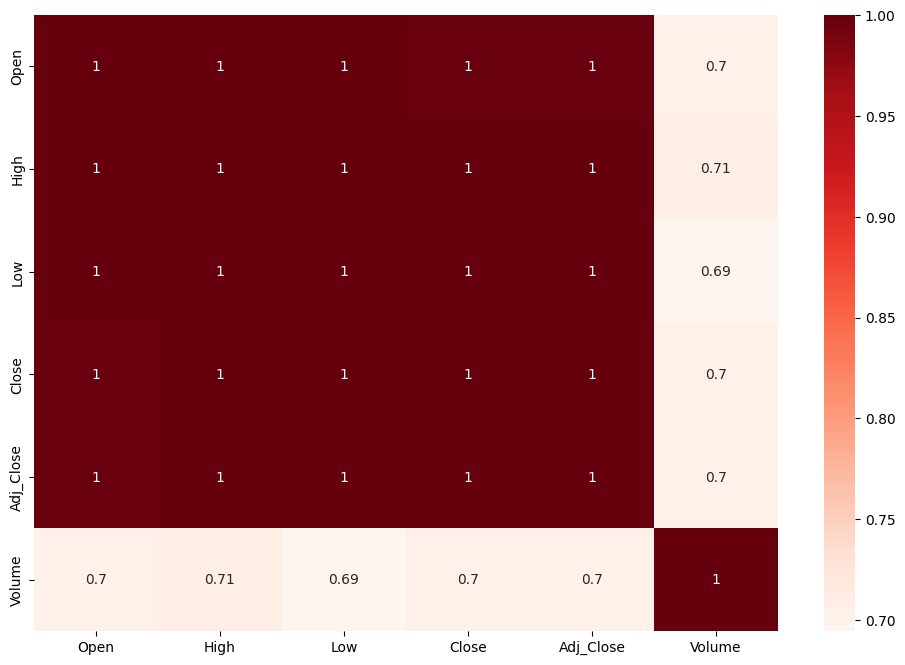

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(btc.corr(),cmap="Reds",annot=True)

In [ ]:
# cleaning the data
btc=btc[["Date","Volume"]]

In [ ]:
# Convert Date into Datetime
btc['Date']=pd.to_datetime(btc['Date'])

In [ ]:
btc.set_index('Date',inplace=True)

In [ ]:
#Aggregate the data
btc=btc["Volume"].resample('MS').sum()

here we are converted days into month wise (M).S Indicates starting date of first month.

In [ ]:
btc = pd.DataFrame(btc, columns=['Volume'])

In [ ]:
btc.shape

(120, 1)

<Axes: xlabel='Date'>

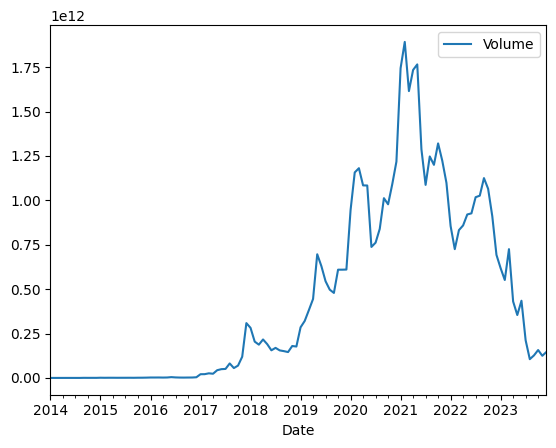

In [ ]:
btc.plot()

plot shows data is not stationary.

** Testing For Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(btc['Volume'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Volume):
    result=adfuller(Volume)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(btc['Volume'])

ADF Test Statistic : -1.6003919969087086
p-value : 0.4833965530129008
#Lags Used : 1
Number of Observations Used : 118
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


adfuller gives 5 values.pvalue is >=0.05.so data is not stationary

**Differencing**

In [ ]:
btc['Volume First Difference']=btc['Volume']-btc['Volume'].shift(1)

shift (1) means 1 record moves down and 1 record will become nan  value. the plot show data is not seasonal. so we shifted only one value.

In [ ]:
btc['Volume'].shift(1)

Date
2014-01-01             NaN
2014-02-01    5.466960e+07
2014-03-01    4.274542e+07
2014-04-01    5.718980e+07
2014-05-01    7.742160e+07
                  ...     
2023-08-01    2.121639e+11
2023-09-01    1.055871e+11
2023-10-01    1.267848e+11
2023-11-01    1.571046e+11
2023-12-01    1.246389e+11
Freq: MS, Name: Volume, Length: 120, dtype: float64

In [ ]:
btc.head(14)

,Volume,Volume First Difference
Date,,
2014-01-01,5.466960e+07,NaN
2014-02-01,4.274542e+07,-11924180.0
2014-03-01,5.718980e+07,14444380.0
2014-04-01,7.742160e+07,20231800.0
2014-05-01,1.183071e+08,40885496.0
2014-06-01,1.048181e+08,-13488976.0
2014-07-01,7.252575e+07,-32292370.0
2014-08-01,8.217047e+07,9644720.0
2014-09-01,5.516432e+08,469472734.0


ADF Test Statistic : -5.666096215283406
p-value : 9.144531179970357e-07
#Lags Used : 4
Number of Observations Used : 114
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

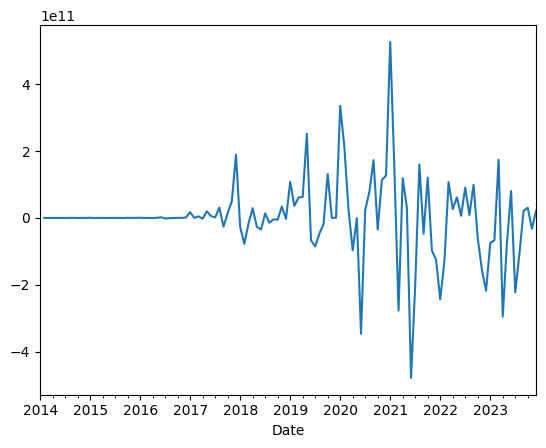

In [ ]:
## Again test dickey fuller test
adfuller_test(btc['Volume First Difference'].dropna())
btc['Volume First Difference'].plot()

dropping the null values.

Date is stationary.

Auto Regressive Model

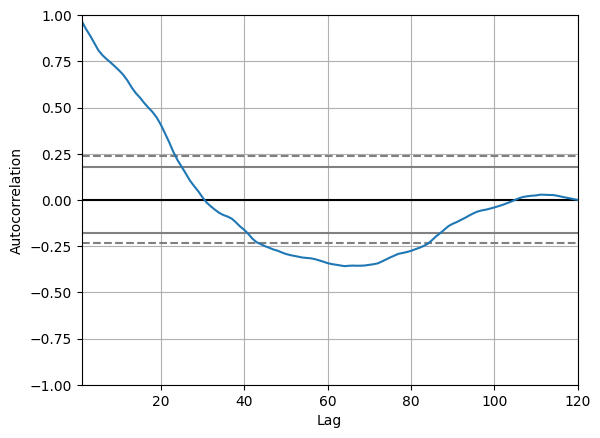

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(btc['Volume'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

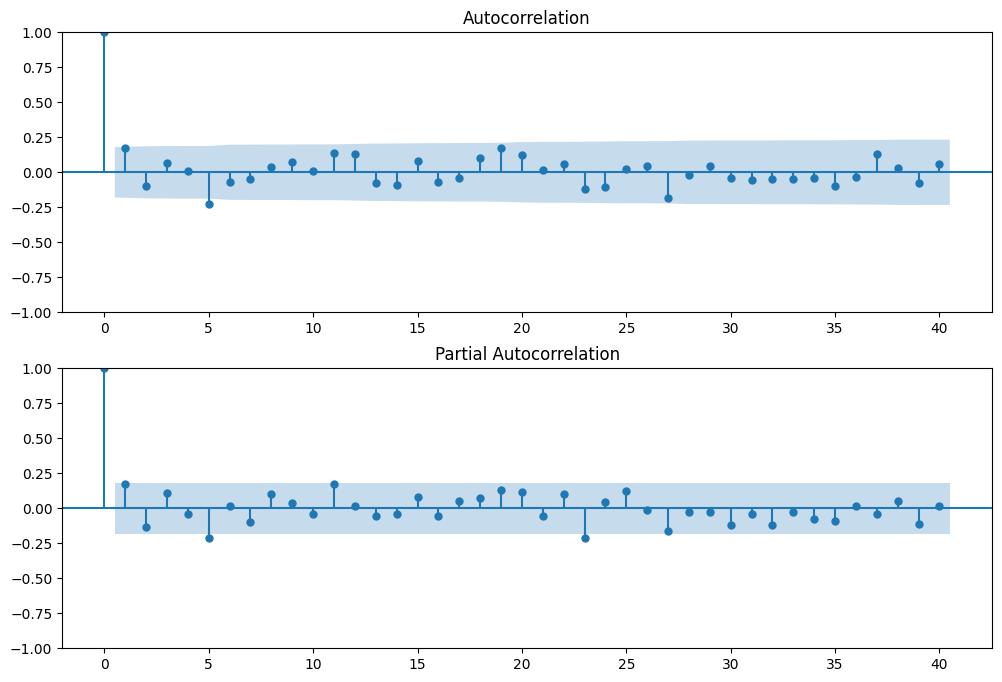

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(btc['Volume First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(btc['Volume First Difference'].iloc[2:],lags=40,ax=ax2)

from pacf and acf we can find p,d,q values.
p= AR model lags
d =differencing
q =MA lags

we used iloc because 1 value is null values.so we started from 2.


acf graph shows slowly decrasing .
pacf graph shows sudden shutoff( reach to zero immediately).

we observed that data is seasonal so we use sarima model.

**SARIMA MODEL**

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(btc['Volume'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Volume   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2893.053
Date:                            Sun, 26 Nov 2023   AIC                           5796.106
Time:                                    15:15:20   BIC                           5809.470
Sample:                                01-01-2014   HQIC                          5801.524
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2613      0.363     -0.720      0.471      -0.972       0.450
ma.L1          0.4944      0.316      1.565      0.118      -0.125       1.113
ar.S.L12       0.0584      0.194      0.302      0.763      -0.321       0.438
ma.S.L12      -0.8213      0.171     -4.811      0.000      -1.156      -0.487
sigma2      2.459e+22   2.01e-23   1.23e+45      0.000    2.46e+22    2.46e+22
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                30.08
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              28.81   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.54e+60. Standard errors may be unstable.
"""

In [ ]:
btc['forecast']=results.predict(start=106,end=119)
btc[['Volume','forecast']].plot(figsize=(15,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
#future_dates=[btc.index[-1].to_timestamp() + DateOffset(months=x)for x in range(1,25)]
last_date = pd.to_datetime(btc.index[-1])

In [ ]:
future_dates = [last_date + DateOffset(months=x) for x in range(1, 25)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=btc.columns)

In [ ]:
future_datest_df.tail()

,Volume,Volume First Difference,forecast
2025-08-01,NaN,NaN,NaN
2025-09-01,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN
2025-11-01,NaN,NaN,NaN
2025-12-01,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([btc,future_datest_df])

<Axes: >

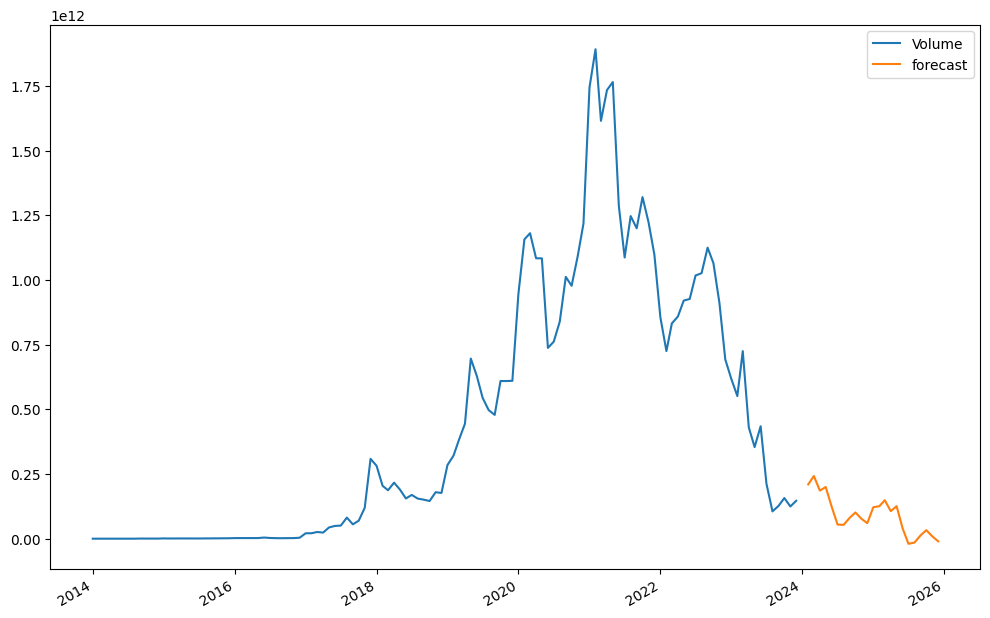

In [ ]:
future_df['forecast'] = results.predict(start = 100, end = 144, dynamic= True)
future_df[['Volume', 'forecast']].plot(figsize=(12, 8))